## Bibliotecas

In [1]:
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Exemplo de transformação via LLE

/home/rogerio/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=11, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


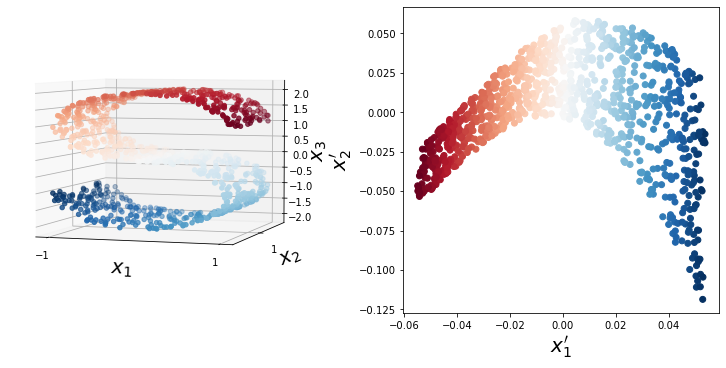

In [10]:
n_points = 1000
x, color = datasets.make_s_curve(n_points, random_state=0)

n_neighbors = 11
n_components = 2

#lle = manifold.LocallyLinearEmbedding(n_neighbors, n_components,method='modified')#, eigen_solver='auto')
lle = manifold.LocallyLinearEmbedding(n_neighbors, n_components, method='standard', random_state=0)#,eigen_solver='auto')
transX = lle.fit_transform(x)


#Geração das figuras
FS = (10,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

#Subgráfico 1
ax = fig.add_subplot(spec[0,0], projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=color, cmap=plt.cm.RdBu)#Spectral)
ax.view_init(4, -72)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)
ax.set_zlabel(r'$x_3$',fontsize=20)
ax.set_xticks([-1,1])
ax.set_yticks([-1,1])

#Subgráfico 2
ax = fig.add_subplot(spec[0,1])
ax.scatter(transX[:, 0], transX[:, 1], c=color, cmap=plt.cm.RdBu)
ax.set_xlabel(r'$x_1^\prime$',fontsize=20)
ax.set_ylabel(r'$x_2^\prime$',fontsize=20)

# ax = fig.add_subplot(spec[0,1], projection='3d')
# ax.scatter(transX[:, 0], transX[:, 1], transX[:, 2], c=color, cmap=plt.cm.RdBu)#Spectral)
# ax.view_init(4, -72)
# ax.set_xlabel(r'$x_1$',fontsize=20)
# ax.set_ylabel(r'$x_2$',fontsize=20)
# ax.set_zlabel(r'$x_3$',fontsize=20)

#plt.savefig('exemploLLE.png',dpi=300)
plt.show()